In [1]:
#import torch
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

In [2]:
train_data = []
train_label = []
with open('3D_Data.csv','r') as file:
    lines = file.readlines()
    w = [0,0,0,0]
    for line in lines[1:]:
        x,y,z,label = line.split(',')
        #print(label[:-1])
        train_data.append(np.array([float(x),float(y),float(z)]))
        train_label.append(int(label[:-1]))

In [3]:
print(train_data[0:10])
print(train_label[0:10])

[array([2.03143 , 2.6607  , 0.652278]), array([4.76514, 4.01763, 1.45695]), array([5.20441, 5.267  , 1.98311]), array([4.45559, 4.56967, 1.37909]), array([3.70426 , 3.64812 , 0.229909]), array([3.46449 , 1.98416 , 0.767762]), array([5.41455, 4.65433, 1.60817]), array([3.29048  , 2.34591  , 0.0395528]), array([2.85841 , 2.6072  , 0.532497]), array([3.15484 , 3.22168 , 0.409013])]
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [4]:
class Perceptron:
    def __init__(self,no_of_features):
        self.weights = np.zeros(no_of_features)
        self.bias = 0
        self.feature = no_of_features
        
    def predict(self, x):
        activation = np.dot(self.weights, x.T) + self.bias 
        if activation >= 0:
            return 1
        else:
            return 0

    def fit(self, X, y, epochs=1, learning_rate=1):
        x_axis = []
        y_axis = []
        z_axis = []
        colors = []
        #line_x = np.arange(0,100,1)
        len_ax = 10
        line_x = np.linspace(-len_ax, len_ax, 100)
        line_y = np.linspace(-len_ax, len_ax, 100)
        line_x, line_y = np.meshgrid(line_x, line_y)
        a, b, c, prev_a, prev_b, prev_c = 0, 0, 0, -1, -1, -1
        for epoch in range(epochs):
            if abs(prev_a-a)<=1e-2 and abs(prev_b-b)<=1e-2 and abs(prev_c-c)<=1e-2:
                break
            for i, x in enumerate(X):
            #for i in range(len(X)):
                x = X[i]
                prediction = self.predict(x)
                error = y[i] - prediction
                self.weights += learning_rate * error * x
                self.bias += learning_rate * error
                #fig = plt.figure()
                
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                
                x_axis.append(x[0])
                y_axis.append(x[1])
                z_axis.append(x[2])
                colors.append('red' if y[i]==0 else 'blue')
                #plt.scatter(x_axis, y_axis, c=colors)
                ax.scatter(x_axis, y_axis, z_axis, c=colors)
                
                prev_a = a
                prev_b = b
                prev_c = c
                a = -self.weights[0]/self.weights[2]
                b = -self.weights[1]/self.weights[2]
                c = -self.bias/self.weights[2]
                
                #plt.plot(slope * line_x + intercept, line_x, '-g')
                ax.plot_surface(line_x, line_y, a * line_x + b * line_y + c, alpha=0.5)
                plt.show()
                #time.sleep(1)
                #plt.close(fig)
                #plt.clf()
                clear_output(wait=True)

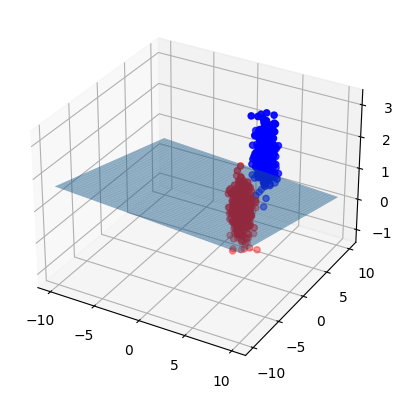

In [ ]:
perceptron = Perceptron(3)
perceptron.fit(np.array(train_data),np.array(train_label),epochs=10,learning_rate = 1)